# Assignment 9: Clustering

In this assignment, you will be working with some age (measured in years) and height (measured in fractional feet.  So, for instance, 5 feet 6 inches would be 5.5 since there are 12 inches in a foot).  The data is admittedly made up, but I chose these interpretations to demonstrate something very important about clustering.  

In the data, there is a feature called `true_cluster`.  Usually, this column would never be available to you (after all, clustering is a form of unsupervised learning). Do not, I repeat, do not use this column in your clustering.  This column has been included for the sole purpose of comparing clustering methods to ground truth.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import seaborn as sns
%matplotlib inline

## Part A (1 Mark)

Load the `age_height_data.csv` data into a pandas dataframe.  Plot a scatterplot of the two variables and colour the dots according to their `true_cluster_label` value for reference.  

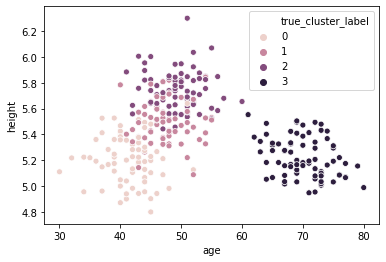

In [2]:
df = pd.read_csv('age_height_data.csv')


sns.scatterplot(data = df, x = 'age', y = 'height', hue = 'true_cluster_label')




## Part B (1 Mark)

There are 4 true clusters in the data.  Create a K-means pipeline using sklearn's `KMeans` with `n_clusters=4`.  Predict on the data and plot the data according to the predicted cluster label.

In [ ]:
X = df.true_cluster_label
myarray = np.asarray(X)
myarray = myarray.reshape(-1,1)

pipe = Pipeline([
    ('aggcl', KMeans(n_clusters=4))
])

df['cluster_label'] = pipe.fit_predict(myarray)

sns.pairplot(vars=df['age'], hue='cluster_label', 
             markers=['X','o','^'], data=df)




## Part C (1 Mark)

You should see that the left most blob is clustered in a way that the decision line between two clusters is nearly vertical.  Does this look like the true cluster labels?  If not, what might explain this?  **Hint**: How is age measured?  How is height measured?  Are they comparable scales?

Write your answer below.

Answer here!

I would believe that this does not look like the true cluster labels because the two clusters is nearly bertical between the decision line and it is not accurate since we cannot define it. 


## Part D (1 Mark)

Add a `StandardScaler` to your pipeline and create the plot again.  Comment on if the scaling helped the clustering in so far as the predicted clusters look more like the true clusters.

In [ ]:
pipe = Pipeline([
    ('scale', StandardScaler()),
    ('aggcl', KMeans(n_clusters=4))
])



## Part E (1 Mark)

In applied clustering, we never know how many clusters exist in the data.  That is something we have to decide.  One method used to determine the number of clusters is to use an elbow plot.

An elbow plot is made by fitting the clustering algorithm for a variety of cluster sizes (usually between 2 and $\sqrt{N}$ clusters, where $N$ is the number of rows in the data.  Each time we fit the clustering algorithm with a different number of clusters, we record the value of the objective function for the algorithm (in sklearn's `KMeans`, this can be done by calling `Kmeans.score`).  The number of clusters is determined by looking for an "elbow" in the data; a point where the algorithm's objective function stops decreasing quickly with additional numbers of clusters.

Create an elbow plot for this data.

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score

pipe_2 = Pipeline([
    ('scale', StandardScaler()),
    ('aggcl', KMeans(n_clusters=4, linkage="single"))
])

synth_df['cluster_label_scaled'] = pipe_2.fit_predict(X)

print(silhouette_score(X, synth_df['cluster_label_scaled']))

sns.pairplot(hue='cluster_label_scaled', vars=[0,1,2], data=df)

## Part F (1 Mark)

Where is the "elbow" for this data?  Justify your answer.  Pretend as if you didn't know there were really 4 clusters in the data.

Answer here!


If I can see the plot I would guess the elbow will be the between the 4 clusters because elbow means stop adding clusters when it doesn't help so when we see the data and it has the inconsistency or do not help data to get more accurate or finding the solutions then it will stop there.  

## Part G (4 Marks)

Read the accompanying paper entitled **Clustering - What Both Theoreticians and Practitioners are Doing Wrong**, then answer the following short answer questions.  Write your answers in the space provided.


1)  Why does the author think the two requirements of clustering conflict with one another?
    
    
2) Summarize the author's criticisms of the theoretician's approach to clustering.

3) Summarize the author's criticisms of the practitioner's approach to clustering.

4) As a practitioner, how might you go about thinking about which algorithm to use for clustering from now on?

Answer here!

1) The author think there is a conflict witht he clustering methods because it will have a different output with the simple input based on the what algorithm the user use. Also, the user need to choose the best clustering algorithm to get the best result.

2)The users do not consider about getting the minimums cost of the solution but they culstering does not evaluate how close to the minimum possible is the cost of the clustering output by some algorithm.

3)There is limitation with the clustering method so the user and the applicators need to know that users need to understand the purpose of it. There will be no perfect or better clustering algorithm so they need to understand it and elaborate with it.

4) I think as a practitioner, I will use the K-means clustering because it is quick and easy to implement. Also, k-means clustering gives the equally-sized clusters so it will be more helpful to find the solution that we need. 